In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
##Crear fechas desde 01-01-2022 hasta 04-05-2023
fechas = pd.date_range(start='01-01-2022',end='04-05-2023')
#fechas = fechas.strftime('%d-%m-%Y')
fechas

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30',
               '2023-03-31', '2023-04-01', '2023-04-02', '2023-04-03',
               '2023-04-04', '2023-04-05'],
              dtype='datetime64[ns]', length=460, freq='D')

In [3]:
dia_semana = fechas.day_name()
dia_semana

Index(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday',
       ...
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object', length=460)

In [4]:
ventas = pd.DataFrame({'fechas':fechas,'nombre_dia':dia_semana})
ventas

,fechas,nombre_dia
0,2022-01-01,Saturday
1,2022-01-02,Sunday
2,2022-01-03,Monday
3,2022-01-04,Tuesday
4,2022-01-05,Wednesday
...,...,...
455,2023-04-01,Saturday
456,2023-04-02,Sunday
457,2023-04-03,Monday
458,2023-04-04,Tuesday


In [5]:
#reglas
#lunes: 5 cervezas
#martes: 20 cervezas
#miercoles: 40 cervezas
#jueves: 150 cervezas
#viernes: 200 cervezas
#sabado: 200 cervezas
#domingo: 0 cervezas

media_dias = {'Monday': 5, 'Tuesday': 20, 'Wednesday': 40, 'Thursday': 150, 'Friday': 200, 'Saturday': 200, 'Sunday': 0}

def simular_ventas(dia):
    '''esta función simula una venta de cerveza
     entradas: dia (dia de la semana) 
     salida: valor con posible venta para ese día'''
    

    resultado_venta = np.random.normal(media_dias[dia],0.3*media_dias[dia])
    resultado_venta = int(np.round(resultado_venta))
    resultado_venta = max(resultado_venta,0)
    return resultado_venta

simular_ventas('Monday')

3

In [6]:
ventas['ventas'] = ventas['nombre_dia'].apply(simular_ventas)

In [9]:
ventas['Fecha'] = ventas['fechas'].dt.weekday
ventas

,fechas,nombre_dia,ventas,Fecha
0,2022-01-01,Saturday,144,5
1,2022-01-02,Sunday,0,6
2,2022-01-03,Monday,6,0
3,2022-01-04,Tuesday,22,1
4,2022-01-05,Wednesday,29,2
...,...,...,...,...
455,2023-04-01,Saturday,141,5
456,2023-04-02,Sunday,0,6
457,2023-04-03,Monday,4,0
458,2023-04-04,Tuesday,29,1


### Grafiquemos los datos de ventas

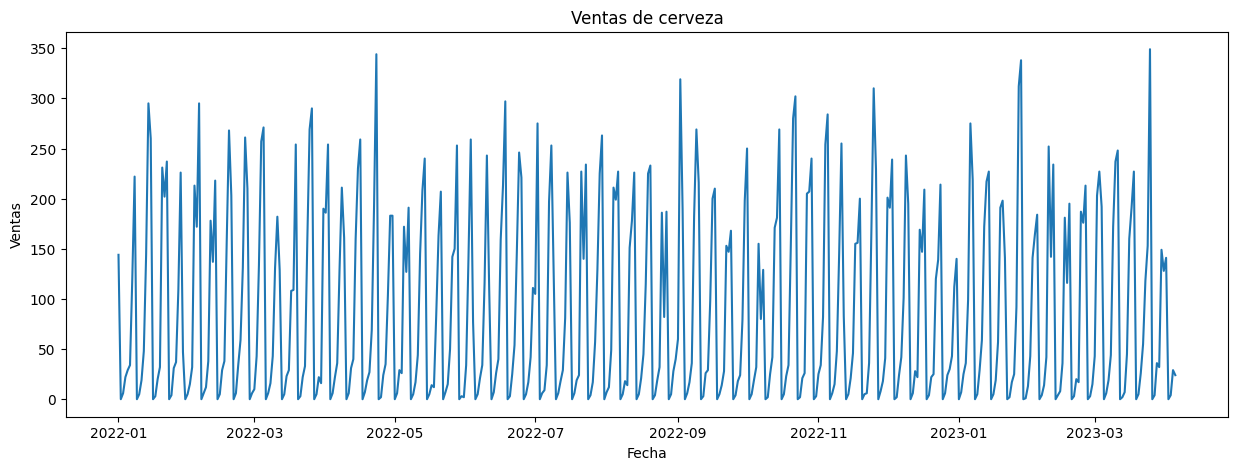

In [8]:
### Visualización de datos

plt.figure(figsize=(15,5))
plt.plot(ventas['fechas'],ventas['ventas'])
plt.title('Ventas de cerveza')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

Para plantear el problema del inventario, tenemos en cuenta lo siguiente:

- El promedio de ventas semanales según la demanda.

In [13]:
### Tomamos los datos de ventas y agrupamos por semana

ventas_semanales = ventas.groupby(pd.Grouper(key='fechas',freq='W')).agg({'ventas':'sum'})
ventas_semanales.drop(ventas_semanales.tail(1).index,inplace=True)
ventas_semanales.drop(ventas_semanales.head(1).index,inplace=True)
ventas_semanales

,ventas
fechas,
2022-01-09,434
2022-01-16,771
2022-01-23,725
2022-01-30,454
2022-02-06,732
...,...
2023-03-05,683
2023-03-12,726
2023-03-19,632


In [14]:
ventas_semanales.describe()

,ventas
count,65.000000
mean,622.338462
std,98.886658
min,355.000000
25%,546.000000
50%,632.000000
75%,701.000000
max,797.000000


In [15]:
### Programaremos una compra de cervezas para el invetario de la siguiente forma:

### Supondremos que todos los lunes a primera hora compramos 720 cervezas, teniendo en cuenta lo que hay en la base ventas, 
### Vamos a describir como se gasta la cerveza en el inventario.

